In [6]:
import os
import re
import math
from collections import defaultdict
import pandas as pd
import numpy as np
import branca
import json
import folium
import geopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import bokeh
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show
from bokeh.models import Range1d
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.io import output_notebook

from IPython.core.display import display, HTML

# Turn slice copy warnings off
plt.ioff()
output_notebook()
pd.options.mode.chained_assignment = None

Loading BokehJS ...

In [7]:
df_claims = pd.read_csv('./data_Hackaton Allianz/claims.csv')

First let us inspect the datatypes present.

In [9]:
df_claims.dtypes

policy_number          int64
claim_number           int64
claim_date            object
notification_date     object
finish_date           object
description           object
country_code          object
country               object
amount_cas           float64
amount_wa            float64
cost_ca              float64
cost_wa              float64
amount_reclaimed     float64
total                float64
dtype: object

Obviously the dates should be converted to a datetime variable type

In [14]:
df_claims['claim_date']=pd.to_datetime(df_claims['claim_date'])
df_claims['notification_date']=pd.to_datetime(df_claims['claim_date'])
df_claims['finish_date']=pd.to_datetime(df_claims['claim_date'])

## DATA CLEANING
### Policy Number
First check for any invalid values in the policy number column

In [15]:
df_claims['policy_number'].isnull().sum(axis=0)

0

There are no invalid values, let's see if there are any strange values present.

In [21]:
display(df_claims['policy_number'].value_counts().sort_values())

18329     1
21669     1
13878     1
26164     1
23724     1
         ..
24181     9
12778     9
20032    10
13685    11
22817    11
Name: policy_number, Length: 8763, dtype: int64

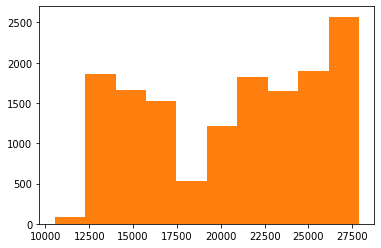

In [28]:
plt.hist(df_claims['policy_number'])
plt.show()

The policy number column seems quite complete, no weird values.

## Claim Number

Same principle:
* check for invalid values (NaN's)
* check for weird, inconsistent values

In [33]:
df_claims['claim_number'].isnull().sum(axis=0)

0

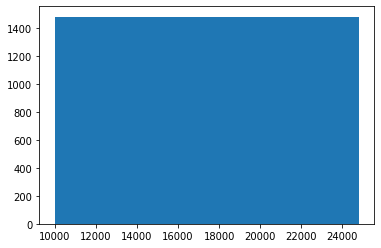

In [34]:
plt.hist(df_claims['claim_number'])
plt.show()

In [41]:
df_claims['claim_number'].duplicated().any()

False

We see that all the claim numbers are unique, this is good.

## Claim date

Again we use the same principle, only for dates 

In [42]:
df_claims['claim_date'].isnull().sum(axis=0)

0